In [1]:
import pandas as pd

In [3]:
seh_binding_dataset = pd.read_csv('../data/raw/seh_binding.csv')

In [4]:
seh_binding_dataset


,target,molecule_id,smiles
0,ERa,CHEMBL100231,CC(C)c1ccc(cc1)N2CCc3cc(O)ccc3C2(C)c4ccc(OCCN5...
1,ERa,CHEMBL10041,CC\C(=C(/c1ccccc1)\c2ccc(OCCN(C)C)cc2)\c3ccc(O...
2,ERa,CHEMBL100595,CC(C)c1cccc(c1)N2CCc3cc(O)ccc3C2(C)c4ccc(OCCN5...
3,ERa,CHEMBL100617,CC1(N(CCc2cc(O)ccc12)c3cccc(O)c3)c4ccc(OCCN5CC...
4,ERa,CHEMBL100763,CC1(N(CCc2cc(O)ccc12)c3ccc(Cl)cc3)c4ccc(OCCN5C...
...,...,...,...
5162,sEH,CHEMBL68172,CCOC(=O)c1ccc(COC(=O)CCCNC(=O)NC23CC4CC(CC(C4)...
5163,sEH,CHEMBL68344,COCCCNC(=O)NC1CCCCC1
5164,sEH,CHEMBL69663,CCCCCCCCCCNC(=O)NC12CC3CC(CC(C3)C1)C2
5165,sEH,CHEMBL70231,CCOC(=O)CCCCCCCCCCOC(=O)CCCNC(=O)NC12CC3CC(CC(...


In [6]:
# Only keep target sEH
seh_binding_dataset = seh_binding_dataset[seh_binding_dataset['target'] == 'sEH']

In [8]:
seh_binding_dataset = seh_binding_dataset.drop(columns=['target', 'molecule_id'])

In [9]:
# Add a column to indicate the target
seh_binding_dataset['binds_sEH'] = 1

In [10]:
# Add column for binding HSA and BRD4
seh_binding_dataset['binds_HSA'] = 0
seh_binding_dataset['binds_BRD4'] = 0

In [13]:
seh_binding_dataset.reset_index(drop=True, inplace=True)
seh_binding_dataset

,smiles,binds_sEH,binds_HSA,binds_BRD4
0,COc1ccc(\C=C\C(=O)OCC(=O)Cc2ccc(O)c(O)c2)cc1O,1,0,0
1,Clc1ccc(NC(=O)Nc2ccc(Cl)c(Cl)c2)cc1,1,0,0
2,CC1(CCCN(C1)C(=O)N[C@H]2C[C@@H]2c3ccccc3)c4ccccc4,1,0,0
3,OC(=O)CC1(CCCN(C1)C(=O)Nc2ccc(Cl)cc2)c3ccccc3,1,0,0
4,OC(=O)CCC1(CCCN(C1)C(=O)Nc2ccc(Cl)cc2)c3ccccn3,1,0,0
...,...,...,...,...
1602,CCOC(=O)c1ccc(COC(=O)CCCNC(=O)NC23CC4CC(CC(C4)...,1,0,0
1603,COCCCNC(=O)NC1CCCCC1,1,0,0
1604,CCCCCCCCCCNC(=O)NC12CC3CC(CC(C3)C1)C2,1,0,0
1605,CCOC(=O)CCCCCCCCCCOC(=O)CCCNC(=O)NC12CC3CC(CC(...,1,0,0


In [15]:
# Save the dataset
seh_binding_dataset.to_csv('../data/shrunken/seh_binding.csv', index=False)

In [16]:
from rdkit import Chem


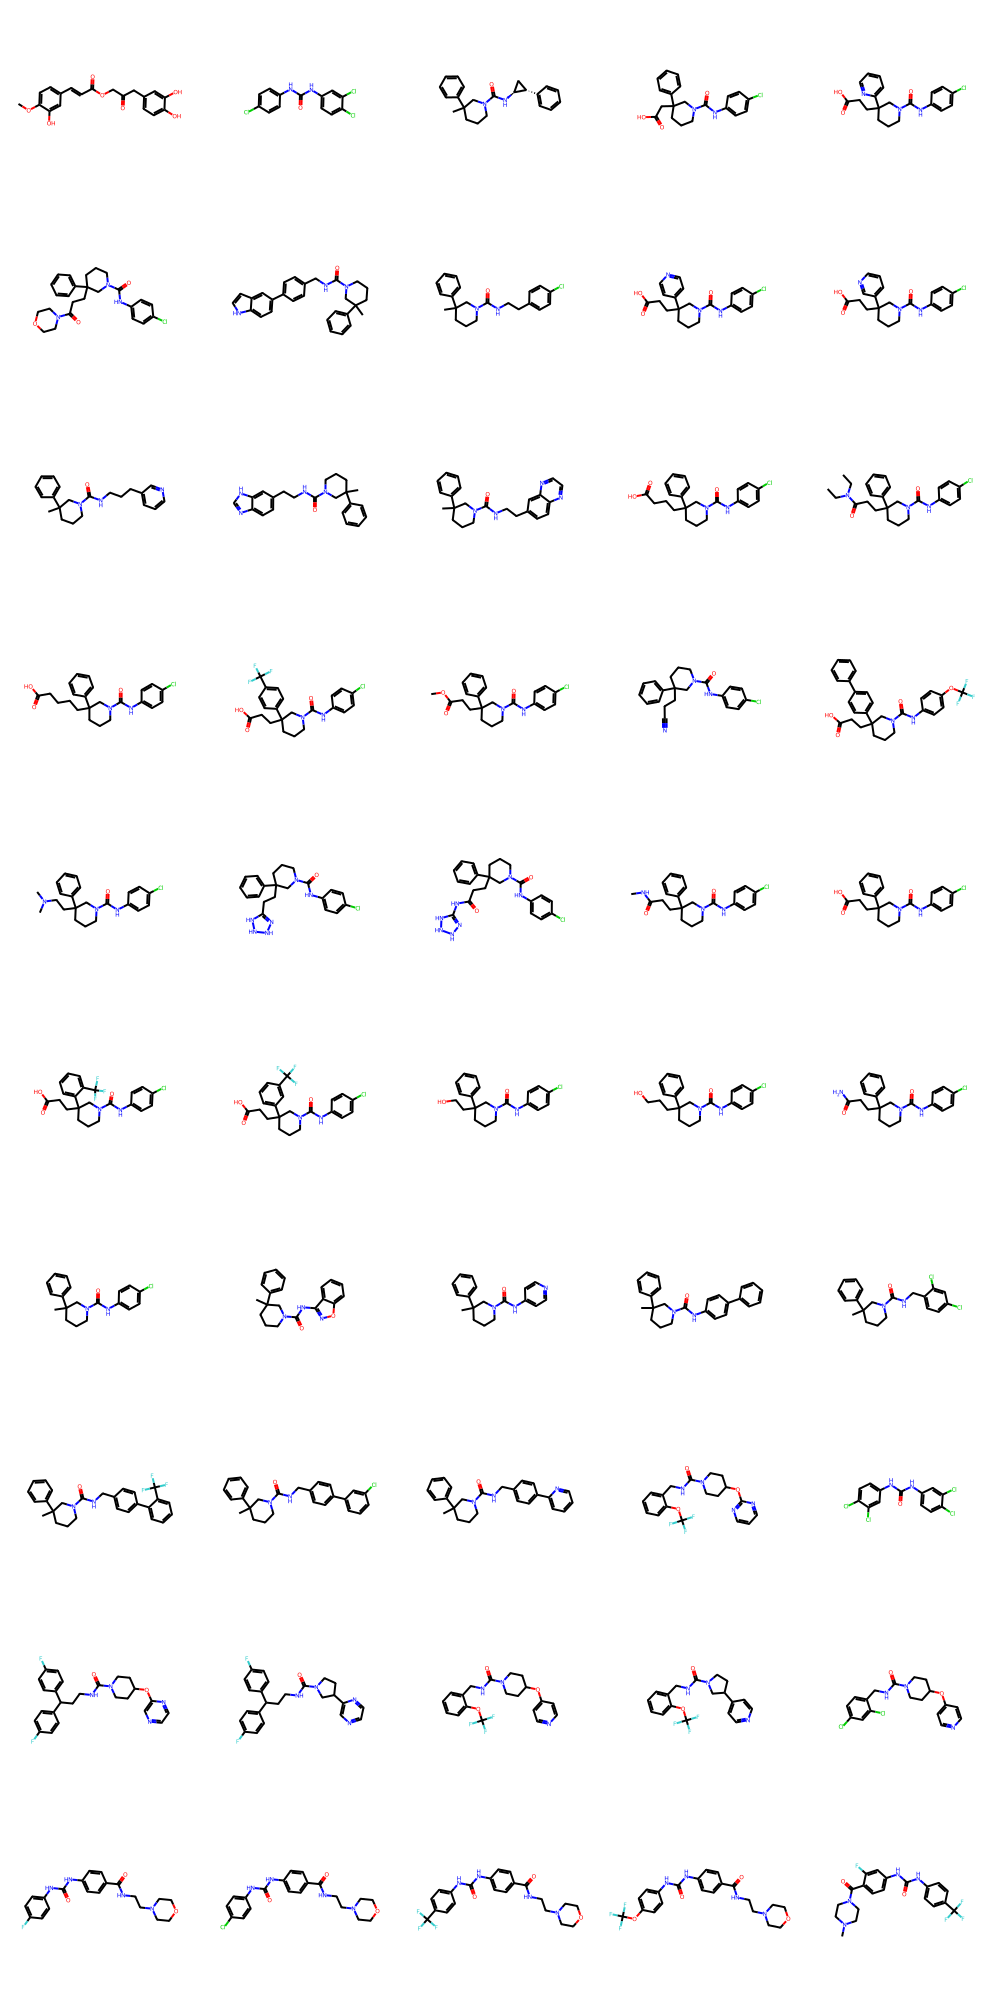

In [21]:
# View the first 10 molecules in a grid
molecules = [Chem.MolFromSmiles(smiles) for smiles in seh_binding_dataset['smiles'][:50]]
img = Chem.Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200))
display(img)